In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from mpl_toolkits import mplot3d
from math import *
import sympy as sp
sp.init_printing(use_unicode=True)

# Question 1

# (a)

In [ ]:
#uij = mean of i-th class and j-th dimension
u11 = 0.5
u12 = 0.8
u21 = 0.9
u22 = 0.2

In [ ]:
rv11 = bernoulli.rvs(u11,size = 100)
rv12 = bernoulli.rvs(u12,size = 100)
rv21 = bernoulli.rvs(u21,size = 100)
rv22 = bernoulli.rvs(u22,size = 100)

In [ ]:
data1 = {}
data2 = {}

c1 = [1]*100
c2 = [2]*100

data1['f1'] = list(rv11)
data1['f2'] = list(rv12)
data1['class'] = c1
data2['f1'] = list(rv21)
data2['f2'] = list(rv22)
data2['class']= c2

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [ ]:
print('Data generation')
print(df1)
print(df2)

Data generation
    f1  f2  class
0    1   1      1
1    1   1      1
2    0   1      1
3    0   1      1
4    1   1      1
..  ..  ..    ...
95   0   1      1
96   1   1      1
97   0   1      1
98   0   1      1
99   0   1      1

[100 rows x 3 columns]
    f1  f2  class
0    1   0      2
1    1   0      2
2    1   0      2
3    1   0      2
4    0   1      2
..  ..  ..    ...
95   1   0      2
96   1   0      2
97   1   0      2
98   1   0      2
99   1   1      2

[100 rows x 3 columns]


In [ ]:
def computeMLE(xi, n):
  return sum(xi[:n])/n

In [ ]:
def plotN_MLE(l,s):

  x = []
  y = []

  for i in range(1,51):
    x.append(i)
    y.append(computeMLE(l,i))

  plt.plot(x, y)
  plt.xlabel("n")  
  plt.ylabel("MLE")  
  plt.title(s)  
  plt.show()

# (b)

In [ ]:
# split a dataset into train and test sets
features1 = df1.loc[ : , df1.columns != 'class']
labels1 = pd.DataFrame(df1['class'])

# split into train test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.50, random_state = 0)

In [ ]:
u11_mle = computeMLE(X_train1['f1'].tolist(),50)
u12_mle = computeMLE(X_train1['f2'].tolist(),50)
u1_mle = np.array([u11_mle,u12_mle])
print('The MLE for class 1 is')
print(u1_mle)

The MLE for class 1 is
[0.54 0.76]


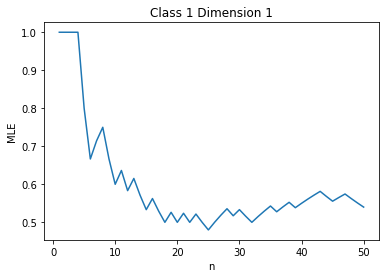

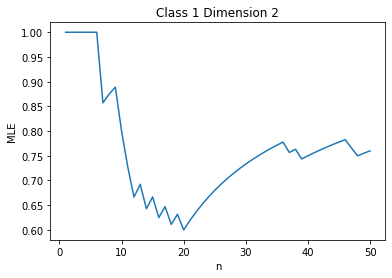

In [ ]:
plotN_MLE(X_train1['f1'].tolist(),'Class 1 Dimension 1')
plotN_MLE(X_train1['f2'].tolist(),'Class 1 Dimension 2')

# (c)

In [ ]:
# split a dataset into train and test sets
features2 = df2.loc[ : , df2.columns != 'class']
labels2 = pd.DataFrame(df2['class'])

# split into train test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.50, random_state = 0)

In [ ]:
u21_mle = computeMLE(X_train2['f1'].tolist(),50)
u22_mle = computeMLE(X_train2['f2'].tolist(),50)
u2_mle = np.array([u21_mle,u22_mle])
print('The MLE for class 2 is')
print(u2_mle)

The MLE for class 2 is
[0.9  0.14]


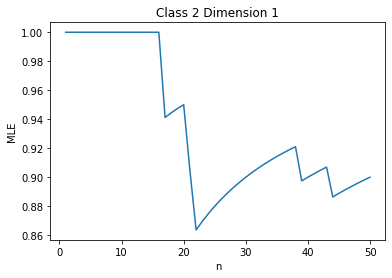

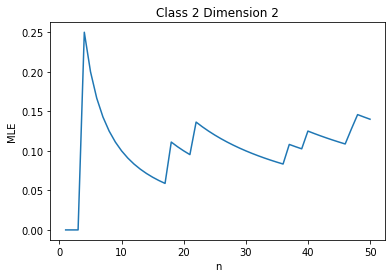

In [ ]:
plotN_MLE(X_train2['f1'].tolist(),'Class 2 Dimension 1')
plotN_MLE(X_train2['f2'].tolist(),'Class 2 Dimension 2')

# (d)

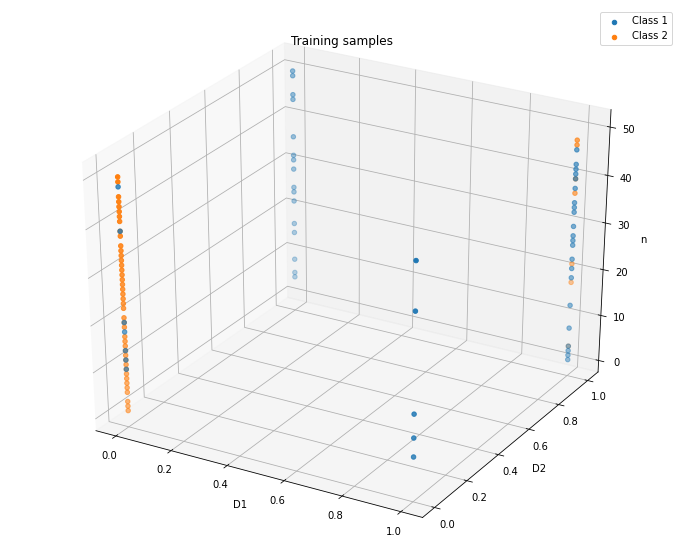

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection ='3d')

z = []
for i in range(0,50):
  z.append(i+1)

x = X_train1['f1'].tolist()
y = X_train1['f2'].tolist()

# plotting
ax.scatter3D(x, y, z, label='Class 1')

x = X_train2['f2'].tolist()
y = X_train2['f2'].tolist()

ax.scatter3D(x, y, z, label='Class 2')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('n')
ax.set_title('Training samples')
plt.legend()
plt.show()


# (e)

In [ ]:
def discriminant(mu11, mu12, mu21, mu22, x1, x2):
  d1 = np.log(pow(u11_mle, x1)*pow(1-u11_mle, 1-x1)*pow(u12_mle, x2)*pow(1-u12_mle, 1-x2))
  d2 = np.log(pow(u21_mle, x1)*pow(1-u21_mle, 1-x1)*pow(u22_mle, x2)*pow(1-u22_mle, 1-x2))
  if d1>=d2:
    return 1
  else:
    return 2

In [ ]:
X_test1_f1 = X_test1['f1'].tolist()
X_test1_f2 = X_test1['f2'].tolist()
pred1 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test1_f1[i], X_test1_f2[i])
  pred1.append(d)

In [ ]:
X_test2_f1 = X_test2['f1'].tolist()
X_test2_f2 = X_test2['f2'].tolist()
pred2 = []
for i in range(50):
  d = discriminant(u11, u12, u21, u22, X_test2_f1[i], X_test2_f2[i])
  pred2.append(d)

In [ ]:
num1 = 0
num2 = 0

for i in range(50):
  if pred1[i]==1:
    num1 += 1
  if pred2[i]==2:
    num2 += 1

print('Accuracy for class 1')
print(num1/50)
print('Accuracy for class 2')
print(num2/50)

Accuracy for class 1
0.92
Accuracy for class 2
0.66


# Question 3

# (c)

In [173]:
X = np.array([[2,4],[6,8]])
mu = np.array([[3],[7]])

print('X')
print(X)

print()

print('Mean')
print(mu)

X
[[2 4]
 [6 8]]

Mean
[[3]
 [7]]


In [174]:
Xc = np.array([[-1,1],[-1,1]])
print('Centralised X')
print(Xc)

Centralised X
[[-1  1]
 [-1  1]]


In [175]:
S = 0.5*(np.dot(Xc,np.transpose(Xc)))
print('The covariance')
print(S)

The covariance
[[1. 1.]
 [1. 1.]]


In [176]:
e1, e2 = np.linalg.eig(S)

print('Eigenvalue 1')
print(e1[0])
print('Eigenvalue 2')
print(e1[1])

print()
print('The eigenvectors are')

print('       1           2')
print(e2)

Eigenvalue 1
2.0
Eigenvalue 2
0.0

The eigenvectors are
       1           2
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [177]:
U = e2

In [178]:
print('U')
print(U)

U
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [179]:
Y = np.dot(np.transpose(U),Xc)
print('Y')
print(Y)

Y
[[-1.41421356  1.41421356]
 [ 0.          0.        ]]


In [180]:
X_ = np.dot(U,Y)
print(X_)
print()

X_[0][0] += 3
X_[0][1] += 3
X_[1][0] += 7
X_[1][1] += 7

print('After adding mean')
print(X_)

[[-1.  1.]
 [-1.  1.]]

After adding mean
[[2. 4.]
 [6. 8.]]


In [181]:
mse = 0
for i in range(2):
  for j in range(2):
    mse += pow(X_[i][j]-X[i][j],2)
mse /= 4
print('MSE = ',mse)

MSE =  0.0


# (d)

In [271]:
d = 3
N = 10
mu = np.array([66, 60, 60])
sigma = np.array([[630, 450, 225], [450, 450, 0], [225, 0, 900]])
X = np.random.multivariate_normal(mu, sigma, N)
X = X.T
X

array([[ 40.97490274,  57.95319624,  95.58106617,  38.91383534,
         81.67278315,  27.89273791,  62.63227633,  53.99529096,
         61.46532793, 103.26678102],
       [ 73.71044075,  53.16849987,  73.70391086,  45.41932815,
         62.56846971,  23.14058947,  62.23951221,  57.35538251,
         61.54151002, 106.58176634],
       [ 34.83137968,  28.12634189,  54.35131725,   4.27040052,
         79.16444769,  52.01735472,  47.41136146,  50.92132095,
         46.5066891 ,  14.18498127]])

# (e)

In [272]:
Xc = np.empty((d,N))
for i in range(d):
  for j in range(N):
    Xc[i][j] = X[i][j]-mu[i]

print('Xc = ', Xc)

S = np.cov(Xc)
print('S = ', S)

eigenValues, eigenVectors = np.linalg.eig(S)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

print(eigenValues)
print('U = ', eigenVectors)

Xc =  [[-25.02509726  -8.04680376  29.58106617 -27.08616466  15.67278315
  -38.10726209  -3.36772367 -12.00470904  -4.53467207  37.26678102]
 [ 13.71044075  -6.83150013  13.70391086 -14.58067185   2.56846971
  -36.85941053   2.23951221  -2.64461749   1.54151002  46.58176634]
 [-25.16862032 -31.87365811  -5.64868275 -55.72959948  19.16444769
   -7.98264528 -12.58863854  -9.07867905 -13.4933109  -45.81501873]]
S =  [[603.91462339 419.94234252  74.16282575]
 [419.94234252 460.74981708 -93.57122028]
 [ 74.16282575 -93.57122028 466.39993969]]
[958.36017344 502.33524143  70.36896529]
U =  [[-0.76348832  0.19199267 -0.61662339]
 [-0.64577536 -0.2155267   0.73247691]
 [ 0.00773139  0.95743776  0.28853625]]


# (f)

In [273]:
def computeMSE(X1, X2, ro, col):
  mse = np.square(np.subtract(X1, X2))
  mse = np.mean(mse)
  return mse

In [274]:
def computeY(U,xc,p):
  U = U[:,:p]
  # print('UUUU = ', U)
  Y = np.dot(np.transpose(U),xc)
  return Y

In [275]:
def computeFinalX(u,y,mean,p,d,N):
  u = u[:,:p]
  x = np.dot(u,y)
  # print(x)
  for i in range(d):
    for j in range(N):
      x[i][j] += mean[i]
  return x

In [276]:
Y = computeY(eigenVectors,Xc,d)
print(Y)
X_ = computeFinalX(eigenVectors,Y,mu,d,d,N)
print(X_)
mse = computeMSE(X_,X,d,N)
print(mse)

[[ 1.00579160e+01  1.03088273e+01 -3.14781186e+01  2.96649415e+01
  -1.34764734e+01  5.28356315e+01  1.02766816e+00  1.08030931e+01
   2.36237787e+00 -5.88883228e+01]
 [-3.18569886e+01 -3.05896004e+01 -2.68247301e+00 -5.54154437e+01
   2.08042514e+01 -7.01501386e+00 -1.31820908e+01 -1.04271005e+01
  -1.41218657e+01 -4.67496944e+01]
 [ 1.82115824e+01 -9.23877442e+00 -9.83242879e+00 -1.00580523e+01
  -2.25322211e+00 -5.80412049e+00  8.47296468e-02  2.84573517e+00
   3.19960670e-02 -2.07879421e+00]]
[[ 40.97490274  57.95319624  95.58106617  38.91383534  81.67278315
   27.89273791  62.63227633  53.99529096  61.46532793 103.26678102]
 [ 73.71044075  53.16849987  73.70391086  45.41932815  62.56846971
   23.14058947  62.23951221  57.35538251  61.54151002 106.58176634]
 [ 34.83137968  28.12634189  54.35131725   4.27040052  79.16444769
   52.01735472  47.41136146  50.92132095  46.5066891   14.18498127]]
4.7542017221319644e-29


# (g)

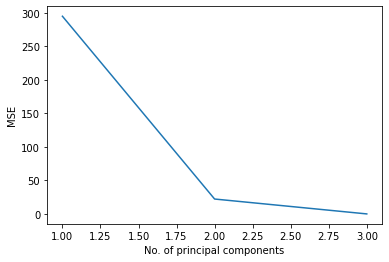

In [277]:
x_axis = []
y_axis = []

for i in range(d):
  x_axis.append(i+1)
  Y = computeY(eigenVectors,Xc,i+1)
  X_ = computeFinalX(eigenVectors,Y,mu,i+1,d,N)
  mse = computeMSE(X_,X,i+1,N)
  y_axis.append(mse)

plt.plot(x_axis, y_axis)
plt.xlabel('No. of principal components')
plt.ylabel('MSE')
plt.show()